# Analysis of a travel dataset from the company ZUBER

# Content <a id='back'></a>

* [Introduction](#intro)
* [Step 1. Data review.](#data_review)
    * [First impressions](#data_review_conclusions)
* [Step 2. Data preprocessing](#data_preprocessing)
    * [2.1 Duplicate values](#duplicate_values)
    * [2.2 Observations](#data_preprocessing_conclusions)
* [Step 3. Data Analysis](#data_analysis)
    * [3.1 Top 10 neighborhoods](#top_10)
    * [3.2 Graphics to ilustrate the amoun of trips per company and the average trips per neighborhoods](#graphics)
    * [3.3 Observations](#observations2)
* [Step 4. Hypothesis test](#hypothesis_test)
    * [4.1 Hypothesis: "Average trip length from the Loop to O'Hare International Airport changes on rainy Saturdays"](#hypothesis)
    * [5.2 Explanation](#explanation)
* [Conclusion](#end)

# Introduction <a id='intro'></a>

In this work, a set of travel data on mobility platforms, in this case the company ZUBER, is analyzed.
The aim is to find relationships between the number of trips, neighborhoods and climate, hypotheses will be tested, among other things.

## Step 1. Data review. <a id='data_review'></a>

In [8]:
# All libraries are loaded

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, levene
import math

### First impressions <a id='data_review_conclusions'></a>

In [12]:
# Import data

df_company = pd.read_csv('moved_project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('moved_project_sql_result_04.csv')
df_trips = pd.read_csv('moved_project_sql_result_07.csv')

In [14]:
# The data frame information and a sample of the data are printed

print(df_company.head())
df_company.info()
df_company.describe()

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [16]:
# The data frame information and a sample of the data are printed

print(df_neighborhoods.head())
df_neighborhoods.info()
df_neighborhoods.describe()

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [18]:
# The data frame information and a sample of the data are printed

print(df_trips.head())
df_trips.info()
df_trips.describe()

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


**Observations**
1. There is not missing values in any data sets.
2. The data type is correct for all data sets.
3. It seems everything is correct and it is posible to continue with the other steps.
4. The values returned by the describe() method are consistent

## Step 2. Data preprocessing <a id='data_preprocessing'></a>

### Duplicate Values <a id='duplicate_values'></a>

In [28]:
# To verify data consistency

df_company['trips_amount'] = pd.to_numeric(df_company['trips_amount'], errors='coerce')
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')
df_trips['duration_seconds'] = pd.to_numeric(df_trips['duration_seconds'], errors='coerce')

In [29]:
# Verify duplicated data

print('Duplicated values in df_company:')
print(df_company[df_company.duplicated()])
print()
print('Duplicated values in df_neighborhoods:')
print(df_neighborhoods[df_neighborhoods.duplicated()])
print()
print('Duplicated values in df_trips:')
print(df_trips[df_trips.duplicated()])

Duplicated values in df_company:
Empty DataFrame
Columns: [company_name, trips_amount]
Index: []

Duplicated values in df_neighborhoods:
Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []

Duplicated values in df_trips:
                 start_ts weather_conditions  duration_seconds
62    2017-11-11 06:00:00               Good            1260.0
74    2017-11-11 08:00:00               Good            1380.0
76    2017-11-04 09:00:00               Good            1380.0
117   2017-11-11 07:00:00               Good            1380.0
119   2017-11-04 14:00:00               Good            3300.0
...                   ...                ...               ...
1054  2017-11-11 07:00:00               Good            1380.0
1058  2017-11-25 12:00:00               Good            1440.0
1062  2017-11-11 06:00:00               Good            1500.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0



**Observations**

1. There are no duplicate values in df_company and df_neighborhoods, the consistency of the data was ensured so we can continue with the next steps
2. Instead, df_trips contains 197 duplicate data, however, this makes sense since we have several companies with many taxis that can coincide in different trips, less than 20% of trips are duplicated, this seems an understandable value so we can continue with the analysis having these duplicate values.

## Step 3. Data Analysis <a id='data_analysis'></a>

### Top 10 neighborhoods <a id='top_10'></a>

In [30]:
# The 10 most popular neighborhoods are calculated

top_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print(top_neighborhoods)

top_company = df_company.sort_values(by='trips_amount', ascending=False).head(10)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### Graphics to ilustrate the amoun of trips per company and the average trips per neighborhoods <a id='graphics'></a>

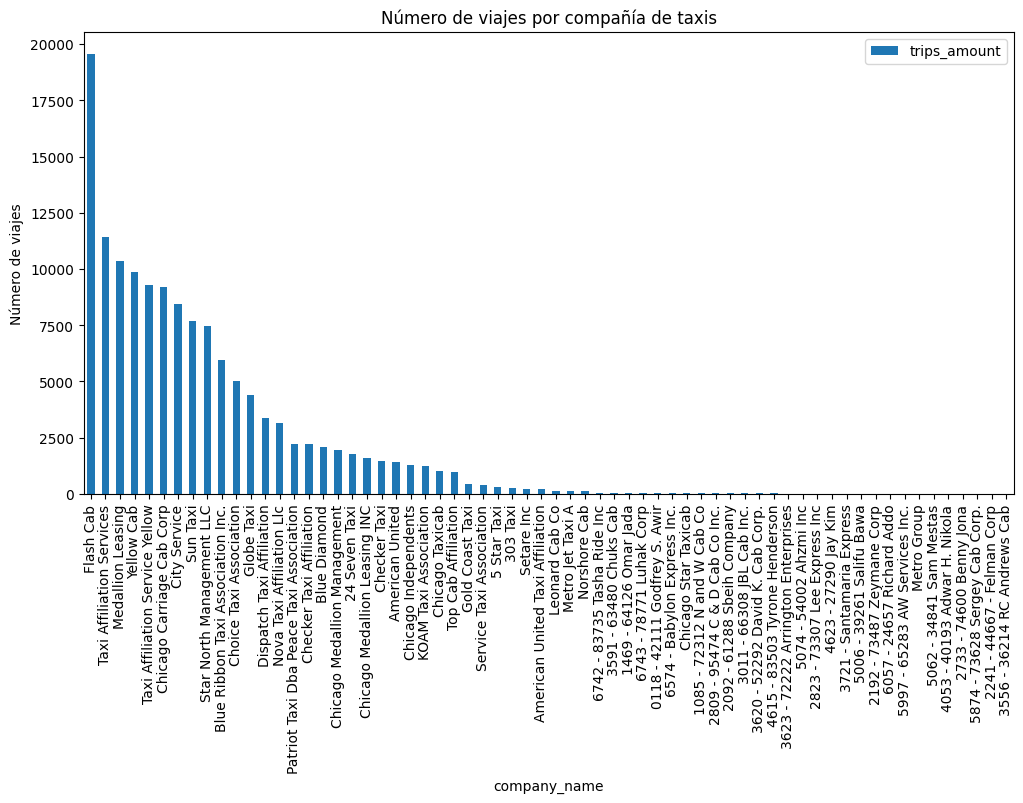

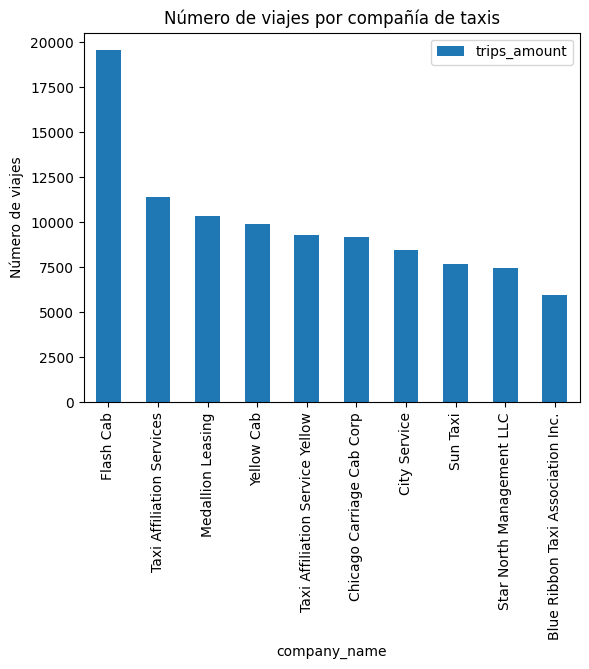

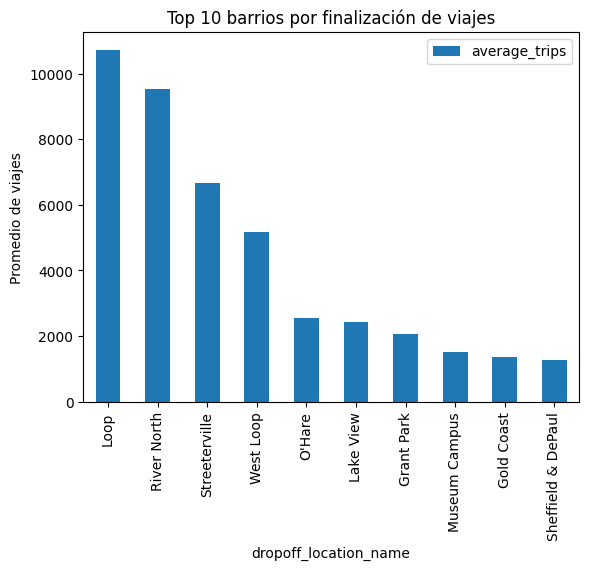

In [31]:
# Chart 1: Taxi companies and number of trips
df_company.sort_values(by='trips_amount', ascending=False).plot(kind='bar', x='company_name', y='trips_amount', figsize=(12, 6))
plt.title('Número de viajes por compañía de taxis')
plt.ylabel('Número de viajes')
plt.show()

# Chart 2: Top 10 companies by number of completions
top_company.sort_values(by='trips_amount', ascending=False).plot(kind='bar', x='company_name', y='trips_amount')
plt.title('Número de viajes por compañía de taxis')
plt.ylabel('Número de viajes')
plt.show()

# Chart 3: Top 10 neighborhoods by number of completions
top_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips')
plt.title('Top 10 barrios por finalización de viajes')
plt.ylabel('Promedio de viajes')
plt.show()

### Observations <a id='observations2'></a>

**Observations**
1. The first graph shows us that the top 5 travel companies on the ZUBER platform control more than 50% of the market and there are 66 different companies, so we see that these companies can offer a better service, they are the ones that have been on the market the longest, they are the largest or have better marketing which makes them more popular.
2. The second graph shows the most popular travel destinations. This may be due to the fact that houses are more concentrated in these areas, there are more squares, cinemas, or restaurants; that is, more touristy areas or the airport.
3. These more popular neighborhoods and larger companies need to be taken into account in order to offer better service and set travel rates.

## Step 4. Hypothesis test <a id='hypothesis_test'></a>

In [ ]:
# Function to remove outliers using the interquartile range (IQR)
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

In [32]:
# Data is loaded to perform the hypothesis

bad_weather = df_trips[df_trips['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = df_trips[df_trips['weather_conditions'] == 'Good']['duration_seconds']

# Remove outliers
bad_weather = remove_outliers(bad_weather)
good_weather = remove_outliers(good_weather)

### Hypothesis: "Average trip length from the Loop to O'Hare International Airport changes on rainy Saturdays" <a id='hypothesis'></a>

In [33]:
# We set alpha at 2% to further restrict the null hypothesis.
alpha = 0.02
stat, p_value = ttest_ind(bad_weather, good_weather)

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en la duración promedio.")
else:
    print("No podemos rechazar la hipótesis nula: No existe una diferencia significativa en la duración promedio.")

Rechazamos la hipótesis nula: Existe una diferencia significativa en la duración promedio.


In [36]:
stat, p_value2 = levene(bad_weather, good_weather)

# Verificar si las varianzas son iguales o no
equal_var = p_value2 > 0.02  # Si p > 0.02, asumimos varianzas iguales

# Realizar la prueba t de Student
t_stat, p_val = ttest_ind(bad_weather, good_weather, equal_var=equal_var)

# Resultados
print(f"Levene's test p-value: {p_value2}")
print(f"T-test p-value: {p_val}")
print(f"Equal variances assumption: {equal_var}")

Levene's test p-value: 0.5332038671974493
T-test p-value: 6.517970327099473e-12
Equal variances assumption: True


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

El parametro equal_var es muy importante para este tipo de pruebas y en este caso no lo utilizas.

Observamos dos opciones, una, si las varianzas para cada conjunto son diferentes (False). Si fueran iguales (True), puede que el resultado cambie, ya que se calcula de forma diferente. Mas que nada cuando la distribucion de las muestras son desiguales (como en este caso).

Por esto es importante, cuando realizamos esta prueba (t student). Confirmar si las varianzas son iguales o no para ambos conjuntos. Para esto se realizan **pruebas estadisticas** (Por ejemplo, **Levene**) para identificar si son iguales o no las varianzas.

Al realizarla ajusta el parametro si fuera necesario y si cambian los resultados modifica la conclusion.</div>
<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido, excelente uso de Levene.</div>
<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Simplemente a modo de consejo, cuando realizamos este tipo de prueba, los outliers pueden modificarla. Por lo que generalmente se recomienda tratarlos antes  de realizar la prueba.
</div>

### Explanation <a id='hypothesis'></a>

Statement of Hypotheses: Null hypothesis (H₀):

The null hypothesis states that there is no difference in the average trip length from the Loop to O'Hare International Airport between rainy Saturdays and other Saturdays. That is, the weather (rainy or not) does not have a significant impact on the duration of trips.

Formally: H₀: μ(sábados lluviosos) = μ(otros sábados)

Alternative hypothesis (H₁):

The alternative hypothesis proposes that there is a difference in the average trip duration between rainy Saturdays and other Saturdays. In other words, the weather could affect the length of trips.

Formally: H₁: μ(sábados lluviosos) != μ(otros sábados)

Criterion for Testing Hypotheses Hypothesis test used: Student's t test for two independent samples.

Justification of the criterion:

Stocking Comparison:

The objective is to compare the means of two independent groups (trip durations on rainy Saturdays and on non-rainy Saturdays). The Student t test is appropriate for this type of comparison when the samples are independent and you want to evaluate whether the population means of the two groups are significantly different. Assumptions:

The Student t test assumes that the samples come from normal distributions and that the variances of both samples are approximately equal. Although the test is robust to moderate deviations from normality, a check for normality and homogeneity of variances can be performed if necessary. Significance level (α):

A typical significance level is α = 0.05, but we will try with a monst adjusted value, in this case of α = 0.02 which means that there is a 5% risk of rejecting the null hypothesis when it is actually true (type I error). If the p-value calculated in the t-test is less than α, the null hypothesis is rejected. Interpretation of the result:

If the p-value is less than 0.02, we conclude that there is enough evidence to reject the null hypothesis and accept that there is a significant difference in the average trip duration between rainy and non-rainy Saturdays. If the p value is greater than 0.02, the null hypothesis is not rejected, suggesting that there is no significant difference in the average trip duration under different weather conditions.

Before fully relying on the t-test results, we perform Levene's test to check whether the variances of trip durations on rainy and non-rainy days are equal.

Null hypothesis (H₀): The variances of trip durations on rainy and non-rainy days are equal.
Alternative hypothesis (H₁): The variances of trip durations on rainy and non-rainy days are different.

## Conclusion <a id='end'></a>

1. The tables were integrated correctly without duplicate, null or data and with the proper format.
2. The most successful companies on this platform are Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Services Yellow... these 5 control more than 50% of the trips and the analysis concludes that the most frequent destinations are Loop, River North and Streeterville, with this we can say that these destinations have a greater concentration of people in need of using the service to these destinations, this could be thanks to housing, plazas, among other things.
3. The null hypothesis test makes it evident that there is a change in average trips from Loop to O'Hare when there are rainy days which makes sense. To enhance this test we could make other hypotheses with different trips in different conditions or graph the relationships using correlation graphs.
4. Since the results change dramatically when adjusting for unequal variances, it is crucial to reconsider the significance of the results and perform careful interpretation.